<a href="https://colab.research.google.com/github/pablosierrafernandez/FarmacoDB/blob/main/model_pipeline/models_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importación de bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
import matplotlib.pyplot as plt
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## 1.1. Carga del conjunto de datos

In [ ]:
drive.mount('/content/drive')
# Carga tu conjunto de datos
data = pd.read_csv('/content/drive/MyDrive/halflife.csv')  # Reemplaza 'tu_archivo.csv' con el nombre de tu archivo

Mounted at /content/drive


# 2. Limpieza de datos

Se han realizado diversas operaciones de limpieza de datos, incluyendo eliminación de valores faltantes, columnas no numéricas, y valores atípicos.

## 2.1. Limpieza

In [ ]:
# Identifica las columnas no numéricas
non_numeric_columns = []
for column in data.columns:
    if data[column].dtype == 'object':
        non_numeric_columns.append(column)
# Elimina las columnas no numéricas
data = data.drop(columns=non_numeric_columns)
# Muestra las columnas no numéricas
print("Columnas no numéricas:")
print(non_numeric_columns)

# Número de filas antes de eliminar
num_filas_antes = len(data)

# Elimina las filas con valores faltantes
data.dropna(inplace=True)

# Número de filas después de eliminar
num_filas_despues = len(data)

# Muestra los resultados
print("Número de filas antes de eliminar:", num_filas_antes)
print("Número de filas después de eliminar:", num_filas_despues)


<ipython-input-4-7a4e9a8e98b7>:2: DtypeWarning: Columns (5,13,104,113,235,243,246,254,257,265,268,276,279,287,290,298,301,309,312,320,323,331,334,343,346,355,358,367,370,379,382,391,394,403,406,415,418,427,430,439,997,1002,1146,1249) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/ANAXOMICS/halflife.csv')  # Reemplaza 'tu_archivo.csv' con el nombre de tu archivo


Columnas no numéricas:
['name', 'AATS0are', 'AATS0s', 'AATS0se', 'AATS1Z', 'AATS1are', 'AATS1d', 'AATS1dv', 'AATS1i', 'AATS1m', 'AATS1p', 'AATS1pe', 'AATS1s', 'AATS1se', 'AATS1v', 'AATS2Z', 'AATS2are', 'AATS2d', 'AATS2dv', 'AATS2i', 'AATS2m', 'AATS2p', 'AATS2pe', 'AATS2s', 'AATS2se', 'AATS2v', 'AATS3Z', 'AATS3are', 'AATS3d', 'AATS3dv', 'AATS3i', 'AATS3m', 'AATS3p', 'AATS3pe', 'AATS3s', 'AATS3se', 'AATS3v', 'AATS4Z', 'AATS4are', 'AATS4d', 'AATS4dv', 'AATS4i', 'AATS4m', 'AATS4p', 'AATS4pe', 'AATS4s', 'AATS4se', 'AATS4v', 'AATS5Z', 'AATS5are', 'AATS5d', 'AATS5dv', 'AATS5i', 'AATS5m', 'AATS5p', 'AATS5pe', 'AATS5s', 'AATS5se', 'AATS5v', 'AATS6Z', 'AATS6are', 'AATS6d', 'AATS6dv', 'AATS6i', 'AATS6m', 'AATS6p', 'AATS6pe', 'AATS6s', 'AATS6se', 'AATS6v', 'AATS7Z', 'AATS7are', 'AATS7d', 'AATS7dv', 'AATS7i', 'AATS7m', 'AATS7p', 'AATS7pe', 'AATS7s', 'AATS7se', 'AATS7v', 'AATS8Z', 'AATS8are', 'AATS8d', 'AATS8dv', 'AATS8i', 'AATS8m', 'AATS8p', 'AATS8pe', 'AATS8s', 'AATS8se', 'AATS8v', 'AATSC0are', 'A

In [ ]:
# Seleccionar columnas con valores booleanos
bool_columns = data.select_dtypes(include=['bool']).columns
print(bool_columns)
# Eliminar las columnas con valores booleanos
data = data.drop(columns=bool_columns)

Index(['GhoseFilter', 'Lipinski'], dtype='object')


In [ ]:
# Reemplazar los valores NaN con 0.0
data = data.fillna(0.0)

# Eliminar columnas que contienen solo valores 0.0
data = data.loc[:, (data != 0.0).any(axis=0)]

## 2.2. Outliers (opcional)

Si nota que quedan muchos valores atípicos aplique el siguiente codigo para eliminar outliers.

In [ ]:


# Calcula el primer y tercer cuartil
Q1 = data['median'].quantile(0.25)
Q3 = data['median'].quantile(0.75)

# Calcula el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Define los límites superior e inferior para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra los datos para eliminar los outliers
data = data[(data['median'] >= lower_bound) & (data['median'] <= upper_bound)]


## 2.3. Test y Train

In [ ]:
X = data.drop(
        ["mean", "std", "median"], axis=1
    )  # Excluir las columnas 'name'  'mean' y 'std
y = data["median"]  # Columna objetivo




In [ ]:


X = X.values.astype(np.float64)
y = y.values.astype(np.float64)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 2.4. Normalización y estandarización

Elija el metodo de normalización y/o estandarización deseado a aplicar a la salida y/o entrada de los datos del modelo.

In [ ]:

input_scaler = StandardScaler() #MinMaxScaler(), StandardScaler(), None
output_scaler = StandardScaler()#MinMaxScaler(), StandardScaler(), None


if input_scaler is not None:

    input_scaler.fit(X_train)

    X_train = input_scaler.transform(X_train)

    X_test = input_scaler.transform(X_test)
if output_scaler is not None:
    y_train = y_train.reshape(len(y_train), 1)
    y_test = y_test.reshape(len(y_test), 1)

    output_scaler.fit(y_train)

    y_train = output_scaler.transform(y_train)

    y_test = output_scaler.transform(y_test)

# 3. Construcción de modelos

A continuación, se procede a la construcción y entrenamiento de todos los modelos predictivos, elija el que mejor se ajuste a sus necesidades o mejor resultados ofrezca.

## 3.1. RLM

### 3.1.1 Entrenamiento

In [ ]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo en los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train = y_train.reshape(-1)  # Convierte en un vector 1D

### 3.1.2 Visualización

MAE - TEST: 88727.34692965902
MAE - TRAIN: 0.9047396747005992
-------------
MSE: 716117013140.0652
RMSE: 846236.9722129052


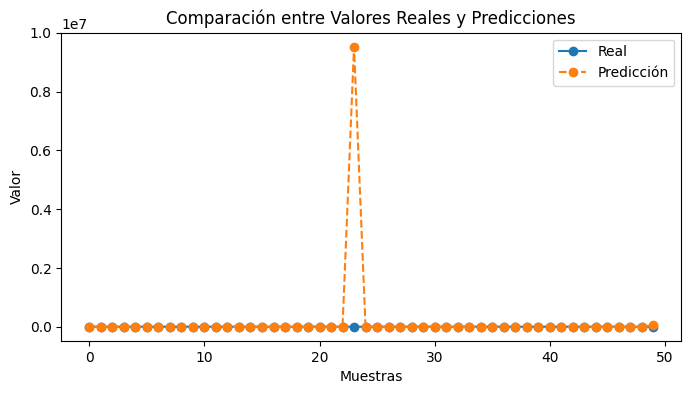

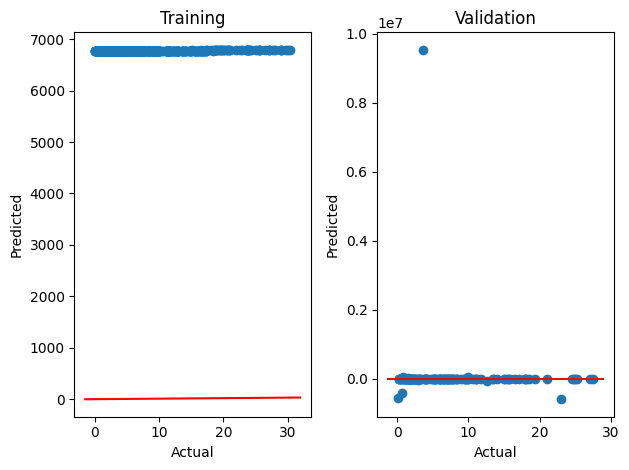

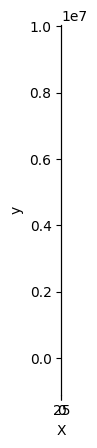

In [ ]:
y_train = output_scaler.inverse_transform(y_train)
y_test = output_scaler.inverse_transform(y_test)
y_pred = output_scaler.inverse_transform(model.predict(X_test).reshape(-1, 1))
trainpreds = output_scaler.inverse_transform(model.predict(X_train).reshape(-1, 1))
X_train=output_scaler.inverse_transform(X_train)
X_test=output_scaler.inverse_transform(X_test)


print("MAE - TEST:",metrics.mean_absolute_error(y_test,y_pred))
print("MAE - TRAIN:",metrics.mean_absolute_error(y_train, trainpreds))
print("-------------")
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# Valores reales
y_real = np.array(y_test[:50])

# Predicciones
y_predd = np.array(y_pred[:50])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# scatterplot of actual vs. pred

fig, axes = plt.subplots(1,2)


axes[0].scatter(x=y_train, y=model.predict(X_train))
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")

x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

axes[1].scatter(x=y_test, y=model.predict(X_test))
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")

x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

fig.tight_layout()


plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('X')
plt.ylabel('y')
_=plt.plot(y_test,y_test,color='orange')

## 3.2 RandomForestRegressor

### 3.2.1 (A) Entrenamiento

In [ ]:
# Definir hiperparámetros
n_estimators = 100  # Número de árboles en el bosque
max_depth = None    # Profundidad máxima de los árboles (None significa sin restricción)

# Crear una instancia del RandomForestRegressor
model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

In [ ]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

<ipython-input-64-f9b4dc86bb7c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### 3.2.2 (A) Visualización

MAE - TEST: 5.090672049714814
MAE - TRAIN: 1.8882095963908216
-------------
MSE: 41.19492771980819
RMSE: 6.418327486176456


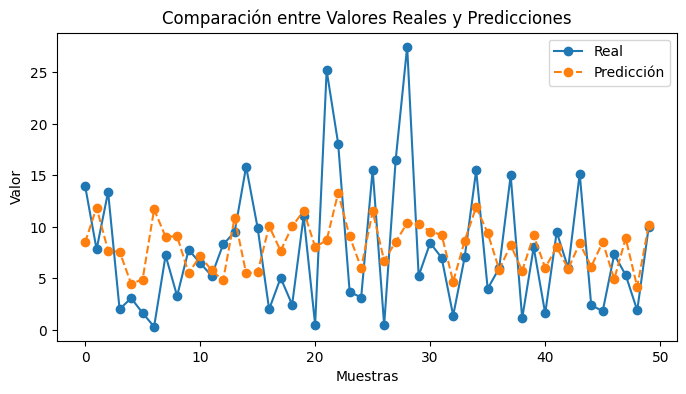

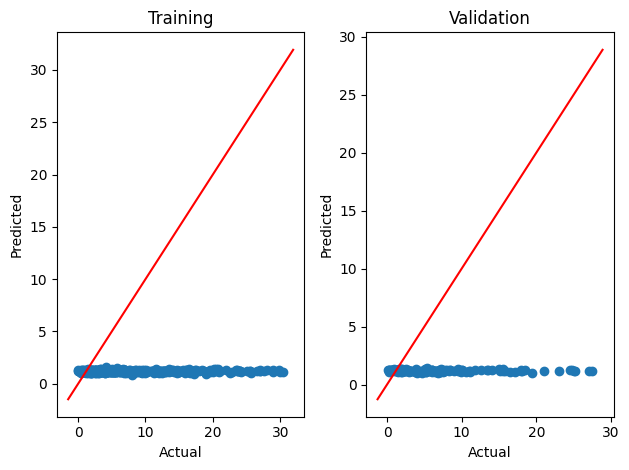

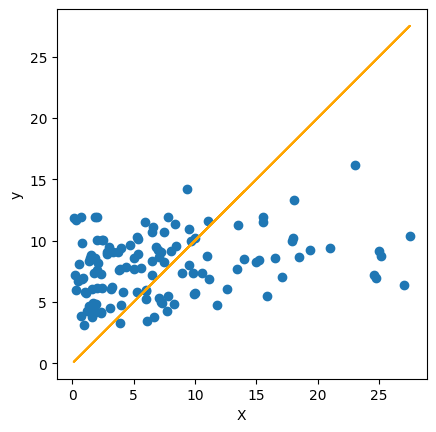

In [ ]:
y_train = output_scaler.inverse_transform(y_train)
y_test = output_scaler.inverse_transform(y_test)
y_pred = output_scaler.inverse_transform(model.predict(X_test).reshape(-1, 1))
trainpreds = output_scaler.inverse_transform(model.predict(X_train).reshape(-1, 1))
X_train=output_scaler.inverse_transform(X_train)
X_test=output_scaler.inverse_transform(X_test)


print("MAE - TEST:",metrics.mean_absolute_error(y_test,y_pred))
print("MAE - TRAIN:",metrics.mean_absolute_error(y_train, trainpreds))
print("-------------")
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# Valores reales
y_real = np.array(y_test[:50])

# Predicciones
y_predd = np.array(y_pred[:50])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# scatterplot of actual vs. pred

fig, axes = plt.subplots(1,2)


axes[0].scatter(x=y_train, y=model.predict(X_train))
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")

x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

axes[1].scatter(x=y_test, y=model.predict(X_test))
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")

x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')


fig.tight_layout()


plt.show()


a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('X')
plt.ylabel('y')
_=plt.plot(y_test,y_test,color='orange')

### 3.2.1 (B) Entrenamiento

In [ ]:

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear una instancia del modelo
model = RandomForestRegressor()

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

# Entrenar el modelo con la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predecir valores en el conjunto de prueba
y_pred = best_model.predict(X_test)




In [ ]:
model = best_model

### 3.2.2 (B) Visualización

In [ ]:
y_train = output_scaler.inverse_transform(y_train)
y_test = output_scaler.inverse_transform(y_test)
y_pred = output_scaler.inverse_transform(model.predict(X_test).reshape(-1, 1))
trainpreds = output_scaler.inverse_transform(model.predict(X_train).reshape(-1, 1))
X_train=output_scaler.inverse_transform(X_train)
X_test=output_scaler.inverse_transform(X_test)


print("MAE - TEST:",metrics.mean_absolute_error(y_test,y_pred))
print("MAE - TRAIN:",metrics.mean_absolute_error(y_train, trainpreds))
print("-------------")
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# Valores reales
y_real = np.array(y_test[:50])

# Predicciones
y_predd = np.array(y_pred[:50])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# scatterplot of actual vs. pred

fig, axes = plt.subplots(1,2)


axes[0].scatter(x=y_train, y=model.predict(X_train))
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")

x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

axes[1].scatter(x=y_test, y=model.predict(X_test))
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")

x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')


fig.tight_layout()


plt.show()


a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('X')
plt.ylabel('y')
_=plt.plot(y_test,y_test,color='orange')

## 3.3 SVR

### 3.3.1 Entrenamiento

In [ ]:

param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.3],
    'kernel': ['linear', 'rbf', 'poly']
}

# Crear una instancia del modelo SVR
svr_model = SVR()

# Realizar la búsqueda en cuadrícula para optimizar hiperparámetros
grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=7, n_jobs=-1, verbose=0)

# Entrenar el modelo con la búsqueda en cuadrícula
grid_search_svr.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo SVR
best_params_svr = grid_search_svr.best_params_
best_svr_model = grid_search_svr.best_estimator_

# Predecir valores en el conjunto de prueba utilizando el mejor modelo SVR
y_pred_svr_best = best_svr_model.predict(X_test)




Mejores hiperparámetros SVR: {'C': 1, 'epsilon': 0.3, 'kernel': 'rbf'}
SVR Mean Squared Error (mejor modelo): 0.9190107336455534
SVR R-squared (mejor modelo): 0.025902570286506887


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model = best_svr_model

### 3.3.2 Visualización

MAE - TEST: 4.802479267912839
MAE - TRAIN: 3.7006284292163074
-------------
MSE: 42.287330447698785
RMSE: 6.502870938877596


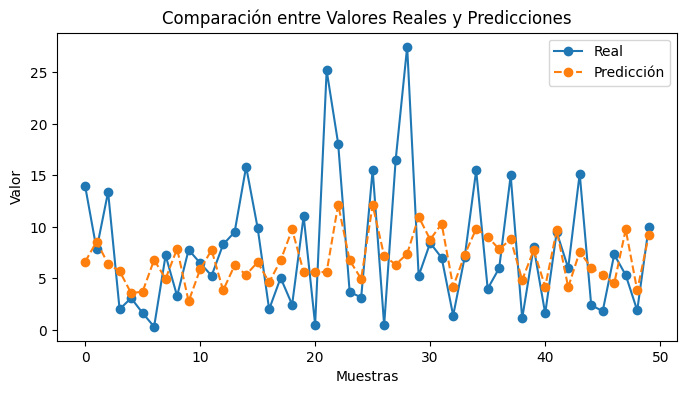

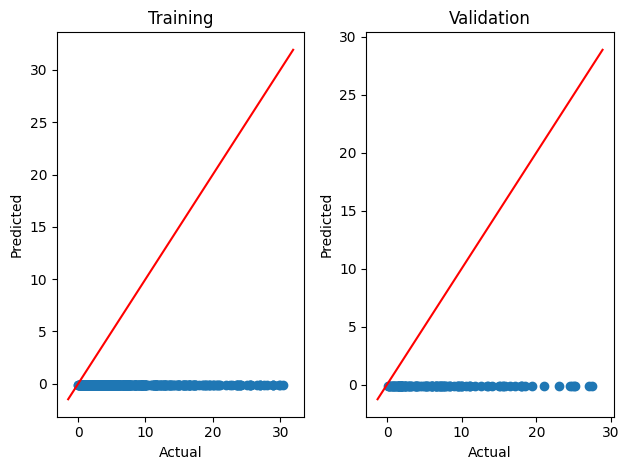

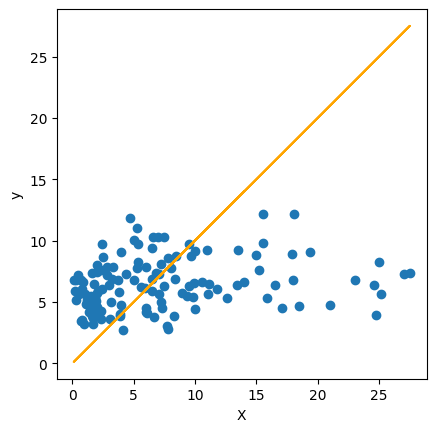

In [ ]:
y_train = output_scaler.inverse_transform(y_train)
y_test = output_scaler.inverse_transform(y_test)
y_pred = output_scaler.inverse_transform(model.predict(X_test).reshape(-1, 1))
trainpreds = output_scaler.inverse_transform(model.predict(X_train).reshape(-1, 1))
X_train=output_scaler.inverse_transform(X_train)
X_test=output_scaler.inverse_transform(X_test)


print("MAE - TEST:",metrics.mean_absolute_error(y_test,y_pred))
print("MAE - TRAIN:",metrics.mean_absolute_error(y_train, trainpreds))
print("-------------")
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# Valores reales
y_real = np.array(y_test[:50])

# Predicciones
y_predd = np.array(y_pred[:50])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# scatterplot of actual vs. pred

fig, axes = plt.subplots(1,2)


axes[0].scatter(x=y_train, y=model.predict(X_train))
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")

x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

axes[1].scatter(x=y_test, y=model.predict(X_test))
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")

x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')


fig.tight_layout()


plt.show()


a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('X')
plt.ylabel('y')
_=plt.plot(y_test,y_test,color='orange')

## 3.4 Red Neuronales

### 3.4.1 (A) Entrenamiento

In [ ]:

model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) e
model.summary()


model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=200,
                   restore_best_weights = True)


history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=1000, # cambiar
                    batch_size=50,
                    verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              587000    
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                                 
Total params: 1213001 (4.63 MB)
Trainable params: 1213001 (4.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
11/11 [==============================] - 2s 69ms/step - loss: 4.8309 - mae: 1.4021 - val_loss: 0.8846 - val_mae: 0.7159
Epoch 2/1000
11/1

### 3.4.2 (A) Visualización

4/4 [==============================] - 0s 7ms/step - loss: 49.8808 - mae: 4.9798
MAE - TEST: 4.85610646080557
MAE - TRAIN: 4.867933068982674
-------------
MSE: 40.70544864771157
RMSE: 6.380082181893237


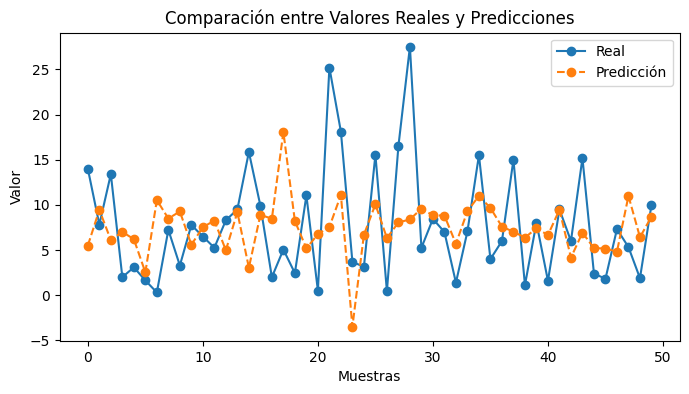

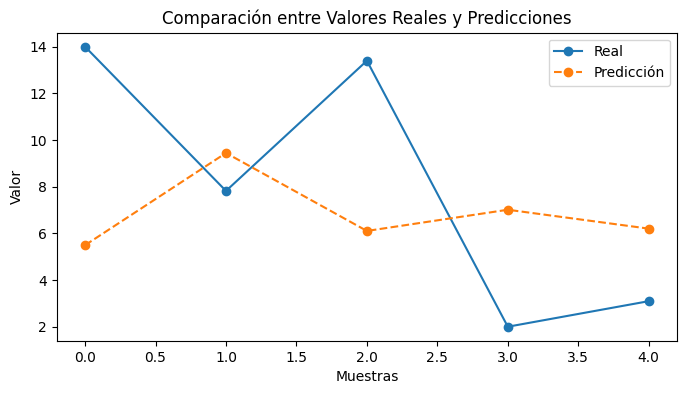

4/4 [==============================] - 0s 6ms/step


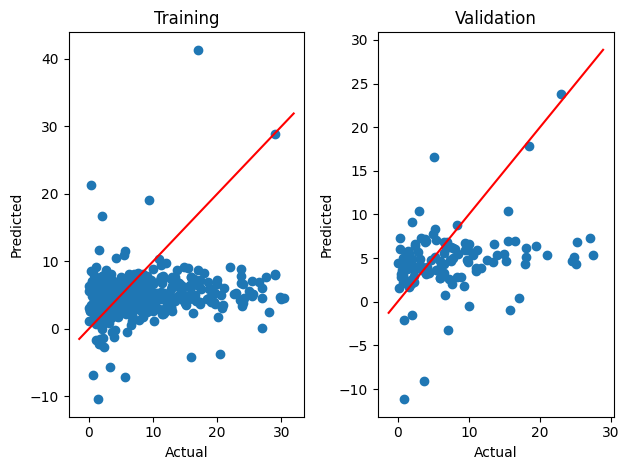

In [ ]:
y_train = output_scaler.inverse_transform(y_train)
y_test = output_scaler.inverse_transform(y_test)
y_pred = output_scaler.inverse_transform(model.predict(X_test))
trainpreds = output_scaler.inverse_transform(model.predict(X_train))
X_train=output_scaler.inverse_transform(X_train)
X_test=output_scaler.inverse_transform(X_test)
model.evaluate(X_train,y_train)
model.evaluate(X_test,y_test)


print("MAE - TEST:",metrics.mean_absolute_error(y_test,y_pred))
print("MAE - TRAIN:",metrics.mean_absolute_error(y_train, trainpreds))
print("-------------")
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# Valores reales
y_real = np.array(y_test[:50])

# Predicciones
y_predd = np.array(y_pred[:50])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# Valores reales
y_real = np.array(y_test[:5])

# Predicciones
y_predd = np.array(y_pred[:5])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# scatterplot of actual vs. pred

fig, axes = plt.subplots(1,2)


axes[0].scatter(x=y_train, y=model.predict(X_train))
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")

x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

axes[1].scatter(x=y_test, y=model.predict(X_test))
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")

x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')


fig.tight_layout()


plt.show()

### 3.4.1 (B) Entrenamiento

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.fit(X_train,y_train,epochs=1000,verbose=1)

Epoch 1/1000
16/16 [==============================] - 1s 3ms/step - loss: 2.4664 - mae: 0.9268 - mse: 2.4664
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8797 - mae: 0.7209 - mse: 0.8797
Epoch 3/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.7202 - mae: 0.6400 - mse: 0.7202
Epoch 4/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.7815 - mae: 0.6401 - mse: 0.7815
Epoch 5/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.6047 - mae: 0.5725 - mse: 0.6047
Epoch 6/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.4954 - mae: 0.5260 - mse: 0.4954
Epoch 7/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.4581 - mae: 0.5061 - mse: 0.4581
Epoch 8/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.3883 - mae: 0.4559 - mse: 0.3883
Epoch 9/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.3695 - mae: 0.4518 - mse: 0.3695
Epoch 10/1000
16/16

### 3.4.2 (B) Visualización

4/4 [==============================] - 0s 4ms/step - loss: 80.5571 - mae: 6.4202 - mse: 80.5571
MAE - TEST: 5.60806980390433
MAE - TRAIN: 0.4354552815615793
-------------
MSE: 52.40324979104111
RMSE: 7.23900889563213


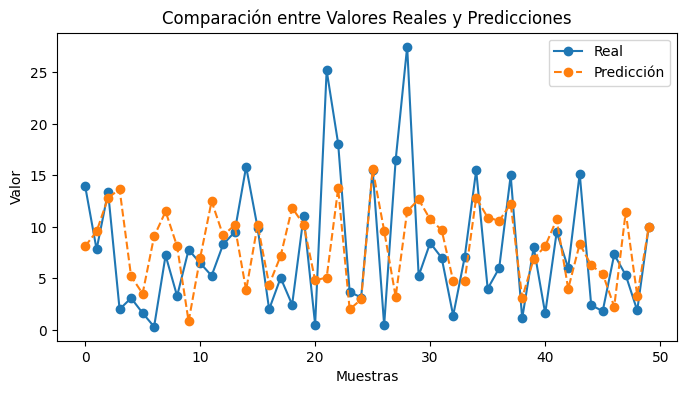

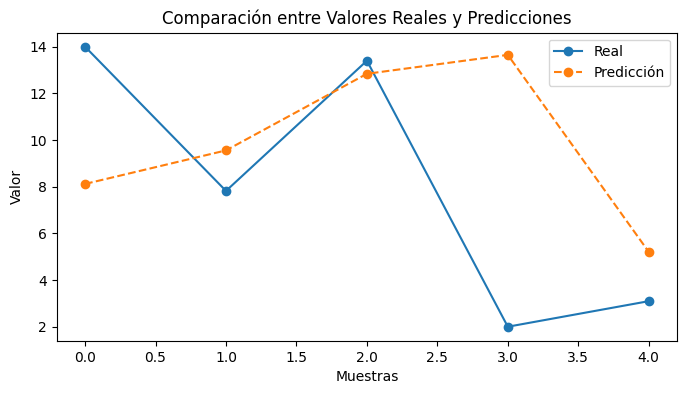

4/4 [==============================] - 0s 6ms/step


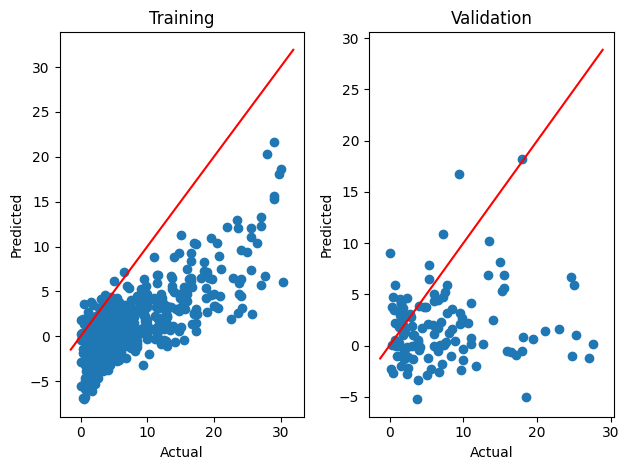

In [ ]:
y_train = output_scaler.inverse_transform(y_train)
y_test = output_scaler.inverse_transform(y_test)
y_pred = output_scaler.inverse_transform(model.predict(X_test))
trainpreds = output_scaler.inverse_transform(model.predict(X_train))
X_train=output_scaler.inverse_transform(X_train)
X_test=output_scaler.inverse_transform(X_test)
model.evaluate(X_train,y_train)
model.evaluate(X_test,y_test)


print("MAE - TEST:",metrics.mean_absolute_error(y_test,y_pred))
print("MAE - TRAIN:",metrics.mean_absolute_error(y_train, trainpreds))
print("-------------")
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# Valores reales
y_real = np.array(y_test[:50])

# Predicciones
y_predd = np.array(y_pred[:50])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# Valores reales
y_real = np.array(y_test[:5])

# Predicciones
y_predd = np.array(y_pred[:5])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# scatterplot of actual vs. pred

fig, axes = plt.subplots(1,2)


axes[0].scatter(x=y_train, y=model.predict(X_train))
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")

x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

axes[1].scatter(x=y_test, y=model.predict(X_test))
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")

x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')


fig.tight_layout()


plt.show()

### 3.4.1 (C) Entrenamiento

In [ ]:

def FunctionFindBestParams(X_train, y_train, X_test, y_test):


    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [50, 100, 200, 300]


    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])


    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1

            model = Sequential()

            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))


            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))


            model.add(Dense(1, kernel_initializer='normal'))


            model.compile(loss='mean_squared_error', optimizer='adam')


            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

FunctionFindBestParams(X_train, y_train, X_test, y_test)

4/4 [==============================] - 0s 3ms/step
1 Parameters: batch_size: 5 - epochs: 50 Accuracy: 125.21736698544953
4/4 [==============================] - 0s 3ms/step
2 Parameters: batch_size: 5 - epochs: 100 Accuracy: -217.47415733307582
4/4 [==============================] - 0s 2ms/step
3 Parameters: batch_size: 5 - epochs: 200 Accuracy: 55.79119906705627
4/4 [==============================] - 0s 3ms/step
4 Parameters: batch_size: 5 - epochs: 300 Accuracy: -3.8040020958298726
4/4 [==============================] - 0s 3ms/step
5 Parameters: batch_size: 10 - epochs: 50 Accuracy: 48.43723937463636
4/4 [==============================] - 0s 4ms/step
6 Parameters: batch_size: 10 - epochs: 100 Accuracy: -268.46757426754846
4/4 [==============================] - 0s 3ms/step
7 Parameters: batch_size: 10 - epochs: 200 Accuracy: -47.76607303964707
4/4 [==============================] - 0s 4ms/step
8 Parameters: batch_size: 10 - epochs: 300 Accuracy: -165.58633004426798
4/4 [===============

In [ ]:
model.fit(X_train, y_train ,batch_size = 20, epochs = 300, verbose=1)

Epoch 1/300
26/26 [==============================] - 1s 2ms/step - loss: 0.9998
Epoch 2/300
26/26 [==============================] - 0s 3ms/step - loss: 0.9968
Epoch 3/300
26/26 [==============================] - 0s 3ms/step - loss: 0.9889
Epoch 4/300
26/26 [==============================] - 0s 3ms/step - loss: 0.9716
Epoch 5/300
26/26 [==============================] - 0s 3ms/step - loss: 0.9466
Epoch 6/300
26/26 [==============================] - 0s 3ms/step - loss: 0.9173
Epoch 7/300
26/26 [==============================] - 0s 3ms/step - loss: 0.8766
Epoch 8/300
26/26 [==============================] - 0s 3ms/step - loss: 0.8382
Epoch 9/300
26/26 [==============================] - 0s 2ms/step - loss: 0.8007
Epoch 10/300
26/26 [==============================] - 0s 2ms/step - loss: 0.7691
Epoch 11/300
26/26 [==============================] - 0s 3ms/step - loss: 0.7434
Epoch 12/300
26/26 [==============================] - 0s 2ms/step - loss: 0.7211
Epoch 13/300
26/26 [=================

### 3.4.2 (C) Visualización

5/5 [==============================] - 0s 6ms/step - loss: 2708.3083
MAE - TEST: 11.918167974969004
MAE - TRAIN: 3.50567201975954
-------------
MSE: 2882.765385969654
RMSE: 53.6913902406117


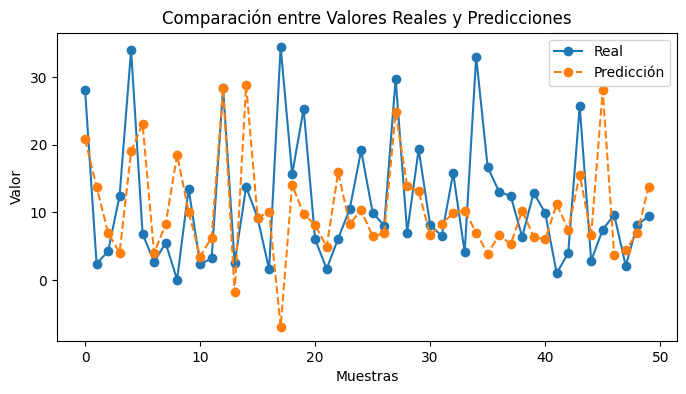

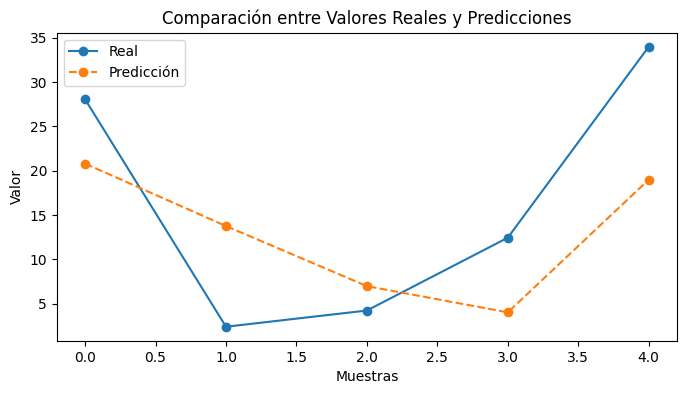

5/5 [==============================] - 0s 3ms/step


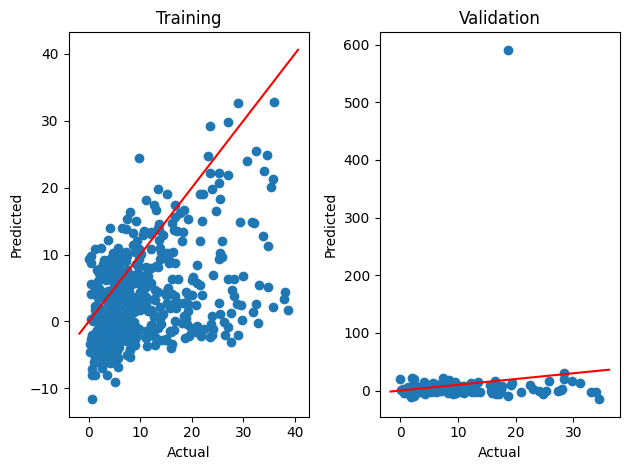

In [ ]:
y_train = output_scaler.inverse_transform(y_train)
y_test = output_scaler.inverse_transform(y_test)
y_pred = output_scaler.inverse_transform(model.predict(X_test))
trainpreds = output_scaler.inverse_transform(model.predict(X_train))
X_train=output_scaler.inverse_transform(X_train)
X_test=output_scaler.inverse_transform(X_test)
model.evaluate(X_train,y_train)
model.evaluate(X_test,y_test)

print("MAE - TEST:",metrics.mean_absolute_error(y_test,y_pred))
print("MAE - TRAIN:",metrics.mean_absolute_error(y_train, trainpreds))
print("-------------")
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# Valores reales
y_real = np.array(y_test[:50])

# Predicciones
y_predd = np.array(y_pred[:50])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# Valores reales
y_real = np.array(y_test[:5])

# Predicciones
y_predd = np.array(y_pred[:5])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# scatterplot of actual vs. pred

fig, axes = plt.subplots(1,2)


axes[0].scatter(x=y_train, y=model.predict(X_train))
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")

x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

axes[1].scatter(x=y_test, y=model.predict(X_test))
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")

x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

fig.tight_layout()


plt.show()

### 3.4.1 (D) Entrenamiento

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.fit(X_train,y_train,epochs=1000,verbose=1)

Epoch 1/1000
16/16 [==============================] - 1s 3ms/step - loss: 1.2829 - mae: 0.8476 - mse: 1.2829
Epoch 2/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.8063 - mae: 0.6879 - mse: 0.8063
Epoch 3/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.6836 - mae: 0.6247 - mse: 0.6836
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5696 - mae: 0.5641 - mse: 0.5696
Epoch 5/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.4769 - mae: 0.5144 - mse: 0.4769
Epoch 6/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.4362 - mae: 0.4840 - mse: 0.4362
Epoch 7/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.3589 - mae: 0.4530 - mse: 0.3589
Epoch 8/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.3345 - mae: 0.4164 - mse: 0.3345
Epoch 9/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.2874 - mae: 0.3875 - mse: 0.2874
Epoch 10/1000
16/16

### 3.4.2 (D) Visualización

4/4 [==============================] - 0s 4ms/step - loss: 97.8404 - mae: 7.5124 - mse: 97.8404
MAE - TEST: 5.173918742023928
MAE - TRAIN: 0.30500653598296185
-------------
MSE: 46.86053736005215
RMSE: 6.845475685447444


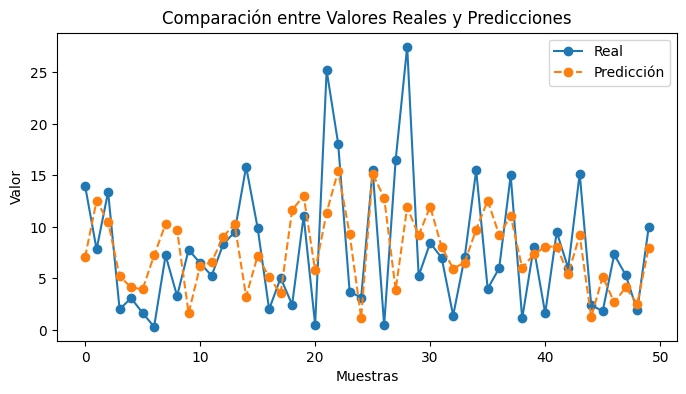

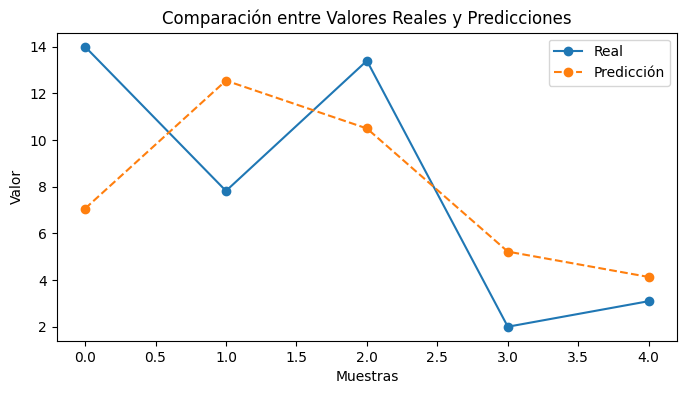

4/4 [==============================] - 0s 5ms/step


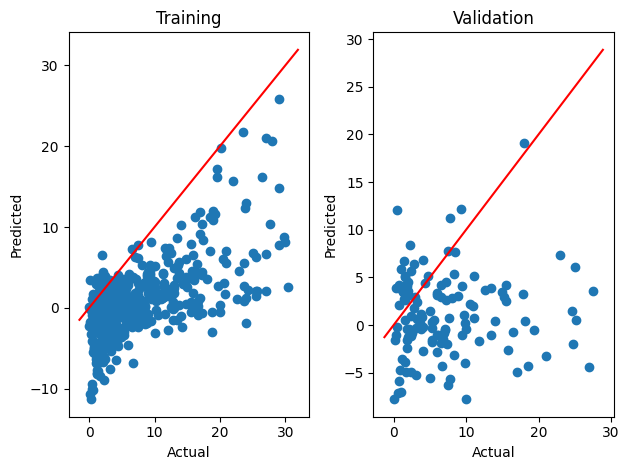

In [ ]:
y_train = output_scaler.inverse_transform(y_train)
y_test = output_scaler.inverse_transform(y_test)
y_pred = output_scaler.inverse_transform(model.predict(X_test))
trainpreds = output_scaler.inverse_transform(model.predict(X_train))
X_train=output_scaler.inverse_transform(X_train)
X_test=output_scaler.inverse_transform(X_test)
model.evaluate(X_train,y_train)
model.evaluate(X_test,y_test)


print("MAE - TEST:",metrics.mean_absolute_error(y_test,y_pred))
print("MAE - TRAIN:",metrics.mean_absolute_error(y_train, trainpreds))
print("-------------")
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# Valores reales
y_real = np.array(y_test[:50])

# Predicciones
y_predd = np.array(y_pred[:50])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# Valores reales
y_real = np.array(y_test[:5])

# Predicciones
y_predd = np.array(y_pred[:5])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# scatterplot of actual vs. pred

fig, axes = plt.subplots(1,2)


axes[0].scatter(x=y_train, y=model.predict(X_train))
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")

x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

axes[1].scatter(x=y_test, y=model.predict(X_test))
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")

x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')


fig.tight_layout()


plt.show()

## 3.5 Keras Tuner (Random Search)



In [ ]:
!pip install -U keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.8 MB/s eta 0:00:00


In [ ]:
import keras_tuner
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from keras_tuner import RandomSearch
from keras_tuner import Objective
print("Keras Tuner Version : {}".format(keras_tuner.__version__))

Keras Tuner Version : 1.4.6


### 3.5.1 Entrenamiento



In [ ]:


def build_model(hyperparams):
    model = Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    model.add(layers.Dense(units=hyperparams.Int("units_l1", 16, 50, step=16),
                           use_bias=hyperparams.Boolean("bias_l1"),
                           activation=hyperparams.Choice("act_l1", ["relu", "tanh"])
                          ))
    model.add(layers.Dense(units=hyperparams.Int("units_l2", 16, 50, step=16),
                           use_bias=hyperparams.Boolean("bias_l2"),
                           activation=hyperparams.Choice("act_l2", ["relu", "tanh"])
                          ))
    model.add(layers.Dense(1))

    optim=hyperparams.Choice("optimizer",["sgd","rmsprop","adam"])
    model.compile(optim, loss="mean_squared_error", metrics=["mean_squared_error"])

    return model

In [ ]:


tuner1 =  RandomSearch(hypermodel=build_model,
                      objective="val_mean_squared_error",
                      #objective=Objective(name="val_mean_squared_error",direction="min"),
                      max_trials=5,
                      #seed=123,
                      project_name="Regression",
                      overwrite=True
                    )

tuner1.search(X_train, y_train, batch_size=20, epochs=1000, validation_data=(X_test, y_test))

Trial 5 Complete [00h 02m 38s]
val_mean_squared_error: 0.928363561630249

Best val_mean_squared_error So Far: 0.9109639525413513
Total elapsed time: 00h 13m 09s


In [ ]:
best_params = tuner1.get_best_hyperparameters()

best_params[0].values

{'units_l1': 32,
 'bias_l1': False,
 'act_l1': 'tanh',
 'units_l2': 48,
 'bias_l2': False,
 'act_l2': 'relu',
 'optimizer': 'sgd'}

In [ ]:
model = tuner1.get_best_models()[0]

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                18752     
                                                                 
 dense_1 (Dense)             (None, 48)                1536      
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 20337 (79.44 KB)
Trainable params: 20337 (79.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3.5.2 Visualización



4/4 [==============================] - 0s 3ms/step - loss: 94.5767 - mean_squared_error: 94.5767
MAE - TEST: 5.1194018944013475
MAE - TRAIN: 4.7907385431734335
-------------
MSE: 41.91706586622156
RMSE: 6.474339029292609


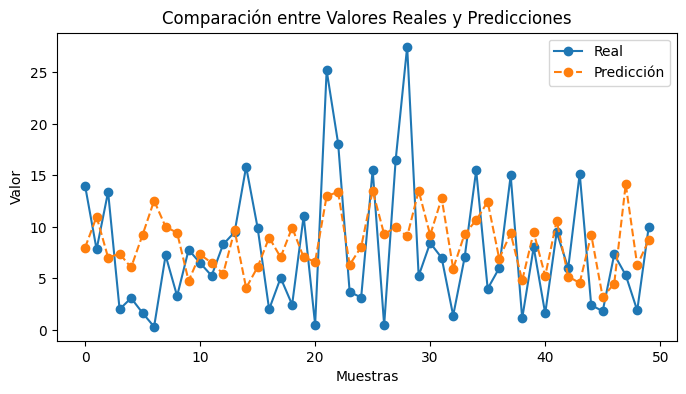

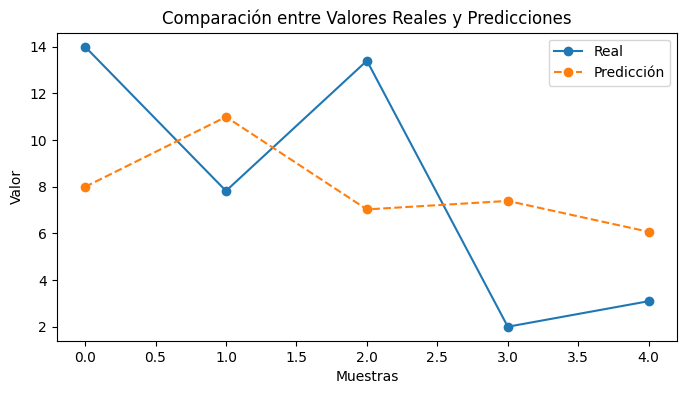

4/4 [==============================] - 0s 3ms/step


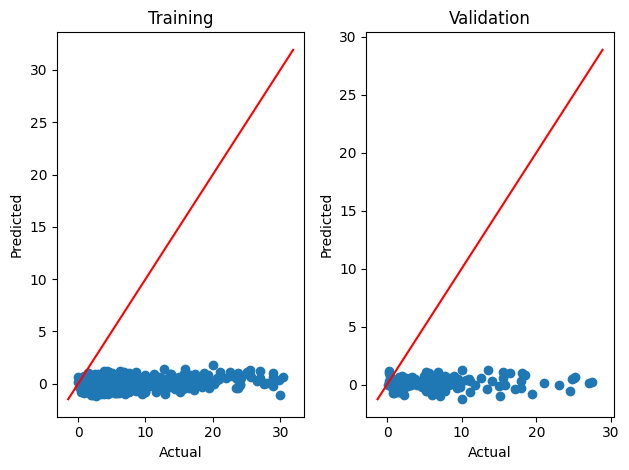

In [ ]:
y_train = output_scaler.inverse_transform(y_train)
y_test = output_scaler.inverse_transform(y_test)
y_pred = output_scaler.inverse_transform(model.predict(X_test))
trainpreds = output_scaler.inverse_transform(model.predict(X_train))  #
X_train=output_scaler.inverse_transform(X_train)
X_test=output_scaler.inverse_transform(X_test)
model.evaluate(X_train,y_train)
model.evaluate(X_test,y_test)

from sklearn import metrics
print("MAE - TEST:",metrics.mean_absolute_error(y_test,y_pred))
print("MAE - TRAIN:",metrics.mean_absolute_error(y_train, trainpreds))
print("-------------")
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# Valores reales
y_real = np.array(y_test[:50])

# Predicciones
y_predd = np.array(y_pred[:50])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# Valores reales
y_real = np.array(y_test[:5])

# Predicciones
y_predd = np.array(y_pred[:5])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# scatterplot of actual vs. pred

fig, axes = plt.subplots(1,2)


axes[0].scatter(x=y_train, y=model.predict(X_train))
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")

x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

axes[1].scatter(x=y_test, y=model.predict(X_test))
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")

x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')


fig.tight_layout()


plt.show()

## 3.6 Bayesian Optimization

In [ ]:
!pip install -q -U keras-tuner

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers
from keras_tuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
import tensorflow as tf
import keras_tuner as kt

### 3.6.1 Entrenamiento

In [ ]:
class RegressionHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(
            layers.Dense(
                units=hp.Int('units', 8, 64, 4, default=8),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                input_shape=input_shape,
                kernel_initializer='zeros', bias_initializer='zeros'
            )
        )

        model.add(
            layers.Dense(
                units=hp.Int('units', 16, 64, 4, default=16),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                kernel_initializer='zeros', bias_initializer='zeros'
            )
        )

        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)
            )
        )

        model.add(layers.Dense(1, kernel_initializer='zeros', bias_initializer='zeros'))

        model.compile(
            optimizer='rmsprop',loss='mse',metrics=['mse']
        )

        return model

In [ ]:
input_shape = (X_train.shape[1],)
hypermodel = RegressionHyperModel(input_shape)

In [ ]:
tuner_boo = BayesianOptimization(
            hypermodel,
            objective='mse',
            max_trials=10,
            seed=42,
            executions_per_trial=2,
            directory='boo'
        )

In [ ]:
tuner_boo.search(X_train, y_train, epochs=300, validation_split=0.2, verbose=1)

Trial 10 Complete [00h 01m 13s]
mse: 0.39284397661685944

Best mse So Far: 0.2680951654911041
Total elapsed time: 00h 13m 25s


In [ ]:
model = tuner_boo.get_best_models(num_models=1)[0]

### 3.6.2 Visualización

4/4 [==============================] - 0s 4ms/step - loss: 71.8146 - mse: 71.8146
MAE - TEST: 5.188761251206062
MAE - TRAIN: 2.9620816187206103
-------------
MSE: 46.7098628459303
RMSE: 6.834461415936906


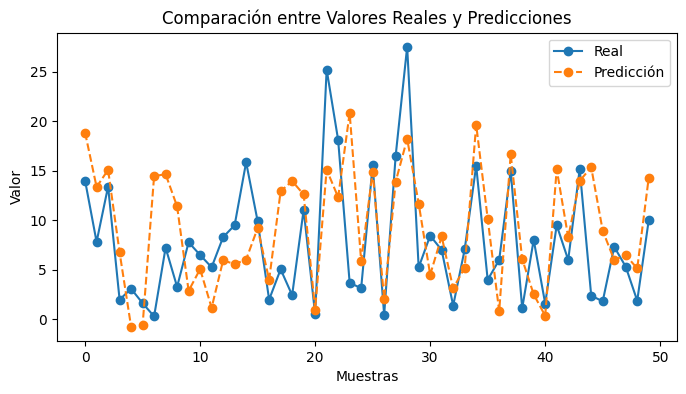

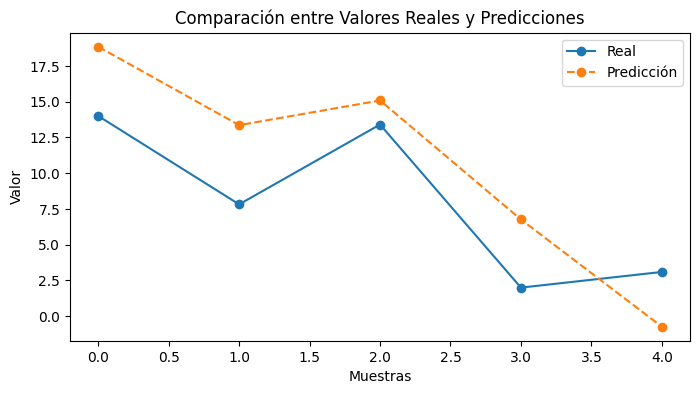

4/4 [==============================] - 0s 4ms/step


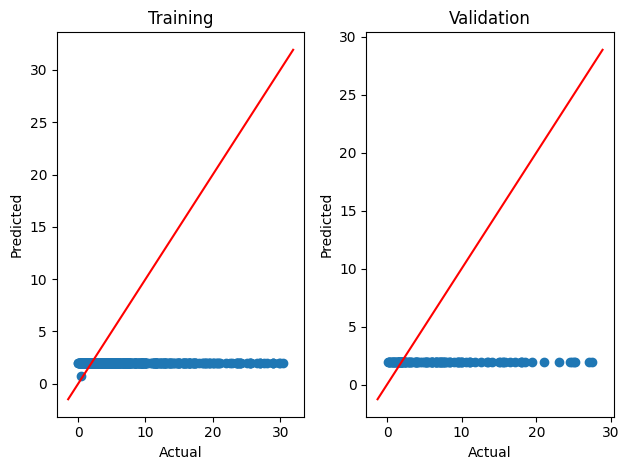

In [ ]:
y_train = output_scaler.inverse_transform(y_train)
y_test = output_scaler.inverse_transform(y_test)
y_pred = output_scaler.inverse_transform(model.predict(X_test))
trainpreds = output_scaler.inverse_transform(model.predict(X_train))
X_train=output_scaler.inverse_transform(X_train)
X_test=output_scaler.inverse_transform(X_test)
model.evaluate(X_train,y_train)
model.evaluate(X_test,y_test)

from sklearn import metrics
print("MAE - TEST:",metrics.mean_absolute_error(y_test,y_pred))
print("MAE - TRAIN:",metrics.mean_absolute_error(y_train, trainpreds))
print("-------------")
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# Valores reales
y_real = np.array(y_test[:50])

# Predicciones
y_predd = np.array(y_pred[:50])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# Valores reales
y_real = np.array(y_test[:5])

# Predicciones
y_predd = np.array(y_pred[:5])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# scatterplot of actual vs. pred

fig, axes = plt.subplots(1,2)


axes[0].scatter(x=y_train, y=model.predict(X_train))
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")

x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

axes[1].scatter(x=y_test, y=model.predict(X_test))
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")

x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')


fig.tight_layout()


plt.show()

## 3.7 Keras Turner (Hyperband)

In [ ]:
pip install -q -U keras-tuner

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner as kt

### 3.7.1 Entrenamiento

In [ ]:
def model_builder(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=[X_train.shape[1]]))

  hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
  hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=1000, step=8)
  hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=1000, step=8)
  hp_learning_rate = hp.Choice('learning_rate', values=[0.001])

  model.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation))
  model.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation))
  model.add(tf.keras.layers.Dense(1))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
              loss='mse',
              metrics=['mse', 'mae'])


  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='mse',
                     max_epochs=100,
                     factor=3,
                     directory='finallll',
                     project_name='xx')

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='mse', patience=3)

In [ ]:
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[stop_early])

Trial 12 Complete [00h 00m 05s]
mse: 1.051949381828308

Best mse So Far: 0.7787184715270996
Total elapsed time: 00h 00m 52s

Search: Running Trial #13

Value             |Best Value So Far |Hyperparameter
relu              |tanh              |activation
265               |425               |layer_1
305               |97                |layer_2
0.001             |0.001             |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model = tuner.hypermodel.build(best_hps)

### 3.7.2 Visualización

In [ ]:
y_train = output_scaler.inverse_transform(y_train)
y_test = output_scaler.inverse_transform(y_test)
y_pred = output_scaler.inverse_transform(model.predict(X_test))
trainpreds = output_scaler.inverse_transform(model.predict(X_train))
X_train=output_scaler.inverse_transform(X_train)
X_test=output_scaler.inverse_transform(X_test)
model.evaluate(X_train,y_train)
model.evaluate(X_test,y_test)

from sklearn import metrics
print("MAE - TEST:",metrics.mean_absolute_error(y_test,y_pred))
print("MAE - TRAIN:",metrics.mean_absolute_error(y_train, trainpreds))
print("-------------")
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# Valores reales
y_real = np.array(y_test[:50])

# Predicciones
y_predd = np.array(y_pred[:50])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# Valores reales
y_real = np.array(y_test[:5])

# Predicciones
y_predd = np.array(y_pred[:5])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# scatterplot of actual vs. pred

fig, axes = plt.subplots(1,2)


axes[0].scatter(x=y_train, y=model.predict(X_train))
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")

x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

axes[1].scatter(x=y_test, y=model.predict(X_test))
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")

x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

fig.tight_layout()


plt.show()

## 3.8 FLAML

In [ ]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 2.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
import matplotlib.pyplot as plt
from flaml import AutoML
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error

### 3.8.1 Entrenamiento

In [ ]:
from flaml import AutoML
from flaml.automl.data import load_openml_dataset

automl = AutoML()
settings = {
    "time_budget": 400,  # total running time in seconds
    "metric": 'r2',  # primary metrics for regression can be chosen from: ['mae','mse','r2']
    "estimator_list": ['xgboost'],
    "task": 'regression',  # task type
    "seed": 7654321,  # random seed
}
automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl.logger: 01-04 22:48:01] {1679} INFO - task = regression
[flaml.automl.logger: 01-04 22:48:01] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 01-04 22:48:01] {1788} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 01-04 22:48:01] {1900} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl.logger: 01-04 22:48:01] {2218} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 01-04 22:48:04] {2344} INFO - Estimated sufficient time budget=23586s. Estimated necessary time budget=24s.
[flaml.automl.logger: 01-04 22:48:04] {2391} INFO -  at 2.4s,	estimator xgboost's best error=1.1871,	best estimator xgboost's best error=1.1871
[flaml.automl.logger: 01-04 22:48:04] {2218} INFO - iteration 1, current learner xgboost
[flaml.automl.logger: 01-04 22:48:04] {2391} INFO -  at 3.0s,	estimator xgboost's best error=1.0283,	best estimator xgboost's best error=1.0283
[flaml.automl.logger: 01-04 22:48:04] {2218} INFO - iteration 2, current learne

In [ ]:

automl.best_estimator

'xgboost'

In [ ]:
print(automl.best_config)

{'n_estimators': 15, 'max_leaves': 12, 'min_child_weight': 3.4641162383071973, 'learning_rate': 0.08619403745213336, 'subsample': 0.948446754703118, 'colsample_bylevel': 0.8841200344436073, 'colsample_bytree': 0.9248724990489212, 'reg_alpha': 0.0009765625, 'reg_lambda': 4.635579665499446}


In [ ]:
model =automl.model.estimator

### 3.8.2 Visualización

MAE - TEST: 8.952500706333907
MAE - TRAIN: 7.368978328972999
-------------
MSE: 207.95940060191953
RMSE: 14.420797502285355


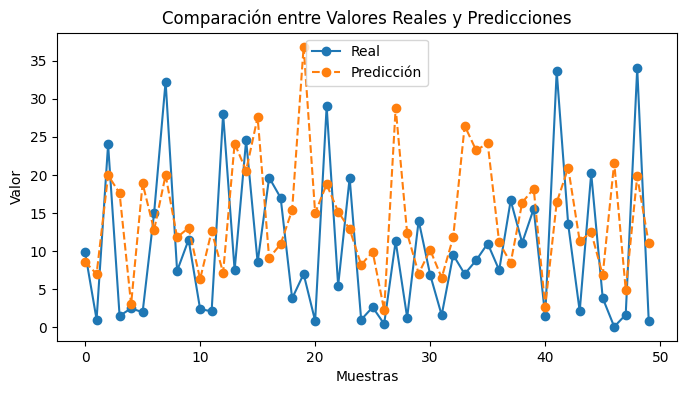

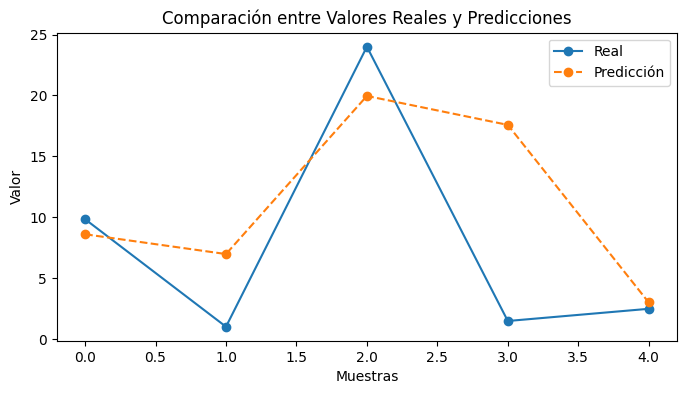

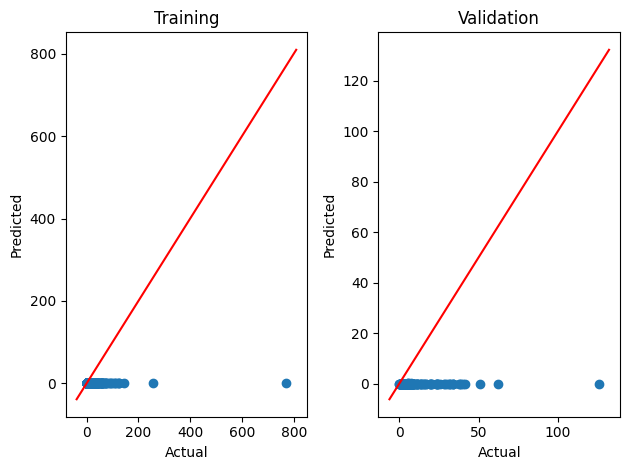

In [ ]:
y_train = output_scaler.inverse_transform(y_train)
y_test = output_scaler.inverse_transform(y_test)
y_pred = output_scaler.inverse_transform(model.predict(X_test)[:, np.newaxis])


trainpreds = output_scaler.inverse_transform(model.predict(X_train)[:, np.newaxis])
X_train=output_scaler.inverse_transform(X_train)
X_test=output_scaler.inverse_transform(X_test)


from sklearn import metrics
print("MAE - TEST:",metrics.mean_absolute_error(y_test,y_pred))
print("MAE - TRAIN:",metrics.mean_absolute_error(y_train, trainpreds))
print("-------------")
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# Valores reales
y_real = np.array(y_test[:50])

# Predicciones
y_predd = np.array(y_pred[:50])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# Valores reales
y_real = np.array(y_test[:5])

# Predicciones
y_predd = np.array(y_pred[:5])
# Crear un array con los índices para etiquetar los puntos en el gráfico
indices = np.arange(len(y_real))

# Crear una figura y ejes
plt.figure(figsize=(8, 4))
plt.plot(indices, y_real, marker='o', label='Real', linestyle='-')
plt.plot(indices, y_predd, marker='o', label='Predicción', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.title('Comparación entre Valores Reales y Predicciones')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
# scatterplot of actual vs. pred

fig, axes = plt.subplots(1,2)


axes[0].scatter(x=y_train, y=model.predict(X_train))
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")

x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

axes[1].scatter(x=y_test, y=model.predict(X_test))
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")

x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')


fig.tight_layout()


plt.show()